<center> 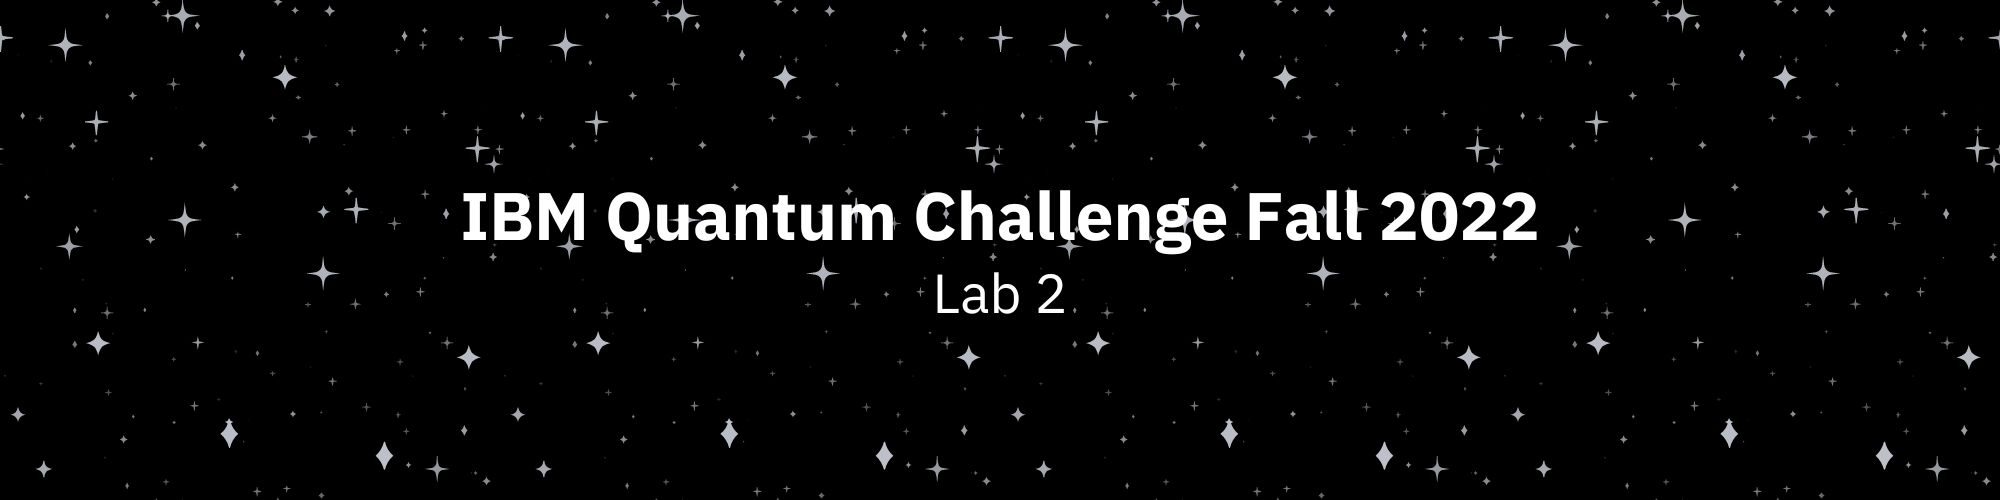 </center>

# Qiskit Runtimeを使った量子カーネル学習（2022秋 Lab2）

## 目的
この課題では「量子誤り訂正」を行うことができない、計算途中でエラーが発生するNISQ（Noisy Intermediate-Scale Quantum device）において量子機械学習を実行することにチャレンジすることが目的です。
qiskitではNISQにおいて発生するエラーを緩和する誤り抑制（Error Mitigation）を使用することができます。

この課題ではMatrix-free Measurement Mitigation(M3)を使用して誤り抑制を実装します。
- Part Ⅰでは課題の定義と理想的なシミュレーションとエラーありのシミュレーションを比較して結果の差異を示します。
- Part Ⅱ, Part Ⅲでは理想的なシミュレーション, エラーありのシミュレーション, 誤り抑制ありのシミュレーションを比較して誤り抑制により理想的なシミュレーションに近い結果が得られることを示します。
- Part ⅣではSamplerを使用して誤り抑制ありのシミュレーションで機械学習（量子サポートベクターマシン）の学習と推論を実行します。

## 得られること
この課題を実施することで以下のスキルが得られます。
- RealAmplitudeを用いてパラメータ付き量子回路（Ansatz）を作成する方法
- 実機と同様のエラーを含んだシミュレーションの実施方法
- Samplerにおいて実機またはシミュレーションにてエラーが発生する場合にエラーを緩和する方法
- Samplerを使用して量子機械学習を実行する方法

## 目次
- **第2章**
- **Part I: データの符号化と確率分布**
    - **Exercise 1: パラメーター化された回路**
- **Part II: Samplerでのエラー緩和の実装**
    - **Exercise 2: Matrix-free Measurement Mitigation (M3)**
- **Part III: Samplerを用いた量子状態の忠実度の推定**
    - **Exercise 3: Samplerを用いた量子状態忠実度**
- **Part IV: 量子カーネルと量子サポートベクターマシン**
    - **Exercise 4: Samplerを使った量子カーネル**
    - **Exercise 5: 未知のビット列を判別する**

## 第2章

こちらにある航宙日誌をご覧ください： **[Captain's Log](https://youtu.be/tBEcjZn56_E)**

<details><summary><b>**クリックするとLogの字幕を読むことができます**</b></summary>
<p>
    “航宙日誌・補足 

重力アシスト作戦は失敗した。計算を重ねた結果 スイングバイに最適な惑星を選んだが失敗し、惑星への緊急着陸を余儀なくされる。我々の量子コンピューターと量子スキャナーの不調が判明した。通常よりノイズの影響にさらされており、エラー訂正が十分ではないようだ。
    
この惑星は...美しい。呼吸できる大気もあり、ティーポットほどの大きさの花をつけた巨大な植物もある。しかし、この星には燃料がないらしく、帰ることはできない。そして空にはブラックホールがそびえ立っている。もちろんクルーは打ちひしがれている。もう少ししたら、私が彼らに話しかけ、慰めと希望を与えるつもりだ。
    
ただ、最後にもうひとつだけ、試してみたいことがある。

というのも、タイムキーパーに異変があることに気づいた。常に地球と同期しているはずのこのデバイスは、どこにいても故郷の時間を正確に把握できるようにしてくれている。その時計によると、我々は...数百年先の未来にいるというのだ...。

さらに、我々の1分1秒が、地球の10年分に相当するようだ。

そこで私はこの不思議な現象を記録する。記録であると同時に 星に放つビーコンのメッセージとして、過去の私がそれを見つけることを願いながら。
 
もし、これをあなたが、または私が聞いているのなら、どうか頼む。君の計算を当てにしないでほしい。君のシステムは故障している。繰り返す：君のシステムは故障している。それを解決するのが先決だ。

私の今後といえば、この世界を探索し- ブラックホールと時間について 学びたい。相対性理論は正しかったが- まさか時間のループが存在していたとは。

そのうち、この場所が好きになるだろう。この惑星が完全にブラックホールに落ちるまで、何百年、何千年もかかるだろう。

そしてそのうちに、この壮大な惑星の資源を採取することを学び、故郷に帰る道を見つけることができるかもしれない。”
    
</p>
</details>

あぜんとして、まばたきをします。もう一度、メッセージを聞きます。そしてもう一度聞きます。声は歪んでいて聞き慣れないが、それでもメッセージは紛れもなくあなたからのもので、どういうわけか時間を越えて運ばれきています。ある種のループする時間的な流れなのでしょうか？そんな現象は理論的にも聞いたことがありません。

直感的にこれはデマではないと思います。しかし、あなたはエンジニアに、メッセージが主張するようにシステムが本当に壊れているかどうかを検証するために、大規模なテストを行うよう依頼しました。ブラックホールから安全な距離を維持するための計算が間違っていたのではないでしょうか?

あなたとクルーは、限られた資源でできる限り量子コンピューターとスキャナーを修理します。

そして、その修理が成功したかどうかをテストしなければなりません。残念ながら、通常使用する精密機器は地球にあるため、船内にあるデータサンプルを分類することで経験的にテストする方法を考案しました。これはprimitiveな方法ですが、あなたの目的には十分です。

このLabを完了して、修復が効果的かどうかをテストしてください：あなたは、十分な精度のある分類器を構築します。


## 準備のStep

このLabでは、量子サポートベクターマシンを含む機械学習の応用問題に対して、エラー緩和技術である行列なし測定緩和（matrix-free measurement mitigation, M3）を適用することに焦点を当てます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import Qiskit
from qiskit import *
from qiskit import Aer, execute

### 補助関数

はじめに、データ処理や結果のプロットなどのための補助的な関数の数々をここで設定します。

In [1]:
def process_samples(circuit, samples):
    """maps dictionary of (quasi-) probabilities to dense vector for illustration.
       (scales exponentially! don't apply to too many qubits!."""
    probs = np.zeros(2**circuit.num_qubits)
    for b, p in samples.quasi_dists[0].items():
        probs[b] = p
    return probs

def plot_probabilities(circuit, probs, label):
    """plots probability vector."""
    x = np.array(range(2**circuit.num_qubits))
    fig, ax = plt.subplots()
    ax.bar(x, probs, align='center', alpha=1, label=label)
    ax.set_title('Probabilities')
    ax.yaxis.grid(True)
    ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x):0{circuit.num_qubits}b}')
    plt.xticks(x[::4], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_cumulative_probabilities(circuit, probs_list, labels):
    """plots multiple cumulative probabilities."""
    x = np.array(range(2**circuit.num_qubits))
    fig, ax = plt.subplots()
    for i, probs in enumerate(probs_list):
        ax.plot(x, np.cumsum(probs), label=labels[i], linewidth=2)
    ax.set_title('Cumulative Probabilities')
    ax.yaxis.grid(True)
    ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x):0{circuit.num_qubits}b}')
    plt.xticks(x[::4], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_fidelities(fidelities_list, labels):
    """plots list of fidelities."""
    fig, ax = plt.subplots()
    for fidelity, label in zip(fidelities_list, labels):
        ax.plot(np.linspace(0, 1, len(fidelity)), fidelity, alpha=1, label=label, linewidth=2)
    ax.set_title('Fidelities')
    ax.yaxis.grid(True)
    plt.legend()
    plt.xlabel('c')
    plt.ylabel('fidelity')
    plt.tight_layout()
    plt.show()

def plot_matrix(A, title):
    """plots a given matrix."""
    # plot matrix
    plt.title(title)
    ax = plt.imshow(A, cmap='viridis')
    plt.colorbar(ax)
    plt.tight_layout()
    plt.show()

## Part I: データの符号化と確率分布

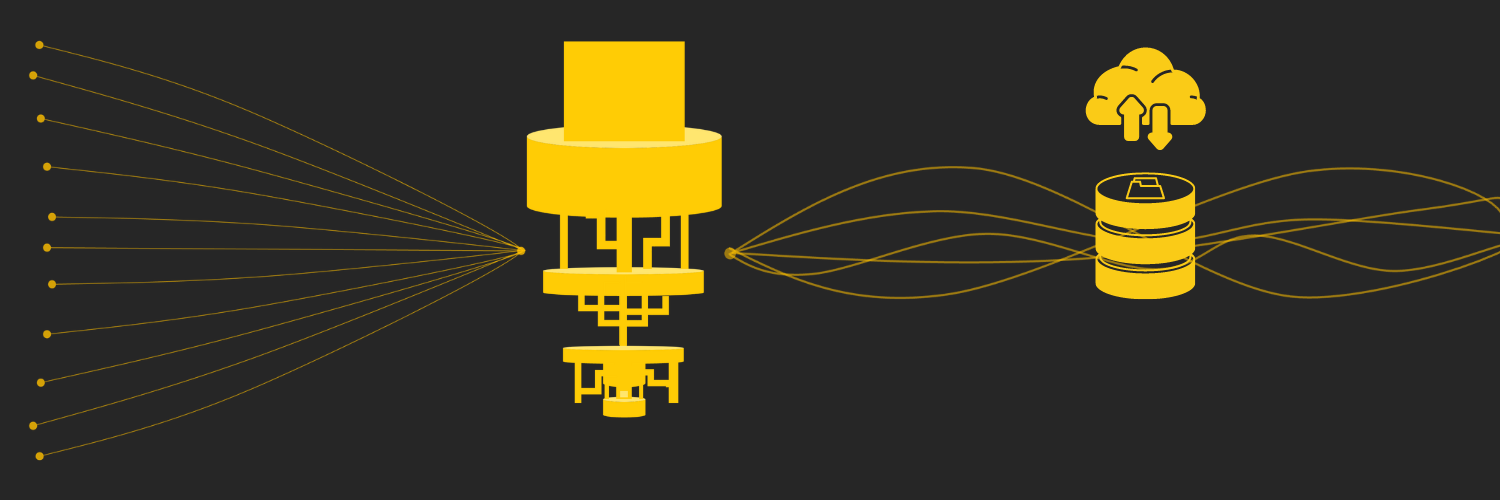


### 量子力学＋機械学習?

機械学習は、データからパターンを見つけ出す学際的な分野として成功を収めています。量子コンピューターは、量子力学で記述可能な方法で情報を操作するものです。機械学習を量子コンピューティングに投入することで、量子力学の原理を利用して機械学習を強化する研究分野、あるいはその逆の研究分野が生まれます。従来の機械学習技術の多くは、強力なハードウェアの登場により、過去10年で大きな進歩を遂げました。量子ハードウェアの存在は、この分野のさらなる発展を可能にします **[[1]](https://learn.qiskit.org/course/machine-learning/introduction)** 。量子機械学習の目的は、モデルの学習、テストベクトルの分類、概念の新しい例の作成に必要なサンプルの複雑さや操作量を軽減することです **[[2]](https://iopscience.iop.org/article/10.1088/1367-2630/abac39/meta)[[3]](https://www.nature.com/articles/nature23474)** 。

### 手書きのビット文字列

船内にあるデータサンプルは、手書きのビット文字列です。この限られたデータサンプルで量子コンピューターとスキャナーをできる限り修理する必要があります。

機械学習技術により、コンピューターは画像中の情報を認識することができます。手書き文字認識の究極の目標は、人間の能力を模倣して、短時間でテキストを読み、編集し、対話できるようにすることです。このため、半世紀以上にわたって多くの研究者がこの分野に注目してきました。用意された **[データセット](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)** を使って、量子分類器の精度を向上させることになります。まず、データセットをロードします。

In [3]:
# import Scikit-learn, a machine learning library for Python
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

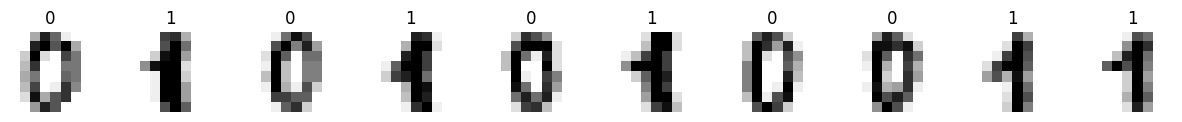

In [4]:
# load two class data (0 and 1) from sklearn dataset
digits = datasets.load_digits(n_class=2)   

# plot some data
fig, axes = plt.subplots(1, 10, figsize=(15, 15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.5, wspace=0.5))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(digits.target[i])

1クラスあたり〜180のサンプルがあります。各データポイントは8x8の数字画像で、各要素は0（白）から16（黒）の間の整数である配列に畳まれています。このデータセットを量子分類に利用するためには、データ範囲を-1〜1の間でスケーリングし、次元を利用するパラメーターの数（ここではn_dim=8）に減らす必要があります。

In [5]:
# split dataset
sample_train, sample_test, labels_train, labels_test = train_test_split(
     digits.data, digits.target, test_size=0.7, random_state=22)

# reduce dimensions
n_dim = 8
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)

# standardize
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

# Normalize
samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)

# select 25 set of data for learning and 10 for test 
train_size = 25
sample_train = sample_train[:train_size]
labels_train = labels_train[:train_size]

test_size = 10
sample_test = sample_test[:test_size]
labels_test = labels_test[:test_size]

In [6]:
# show the first data sample
print(sample_train[0], labels_train[0])
print(sample_test[0], labels_test[0])

[-0.91749803 -0.16718998 -0.50461104 -0.39108743 -0.39591321 -0.20579425
  0.03043893  0.2636446 ] 0
[ 0.40600558 -0.74742494  0.73281596 -0.23290429 -0.35820492 -0.36234378
  0.14955469  0.00752033] 1


In [7]:
labels_train

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1])

### データの符号化

今回のタスクである分類を含む、機械学習の一般的な課題は、データのパターンを発見し研究することです。多くの機械学習アルゴリズムは、カーネル関数を用いて入力データセットをより高次元の特徴量空間にマッピングします。

下の左の図のデータセットを見ると、明らかに構造があることが分かりますが、2つの円は2次元では線形分離できません。このデータを3次元に変換して見ましょう：$z = x^2+y^2$


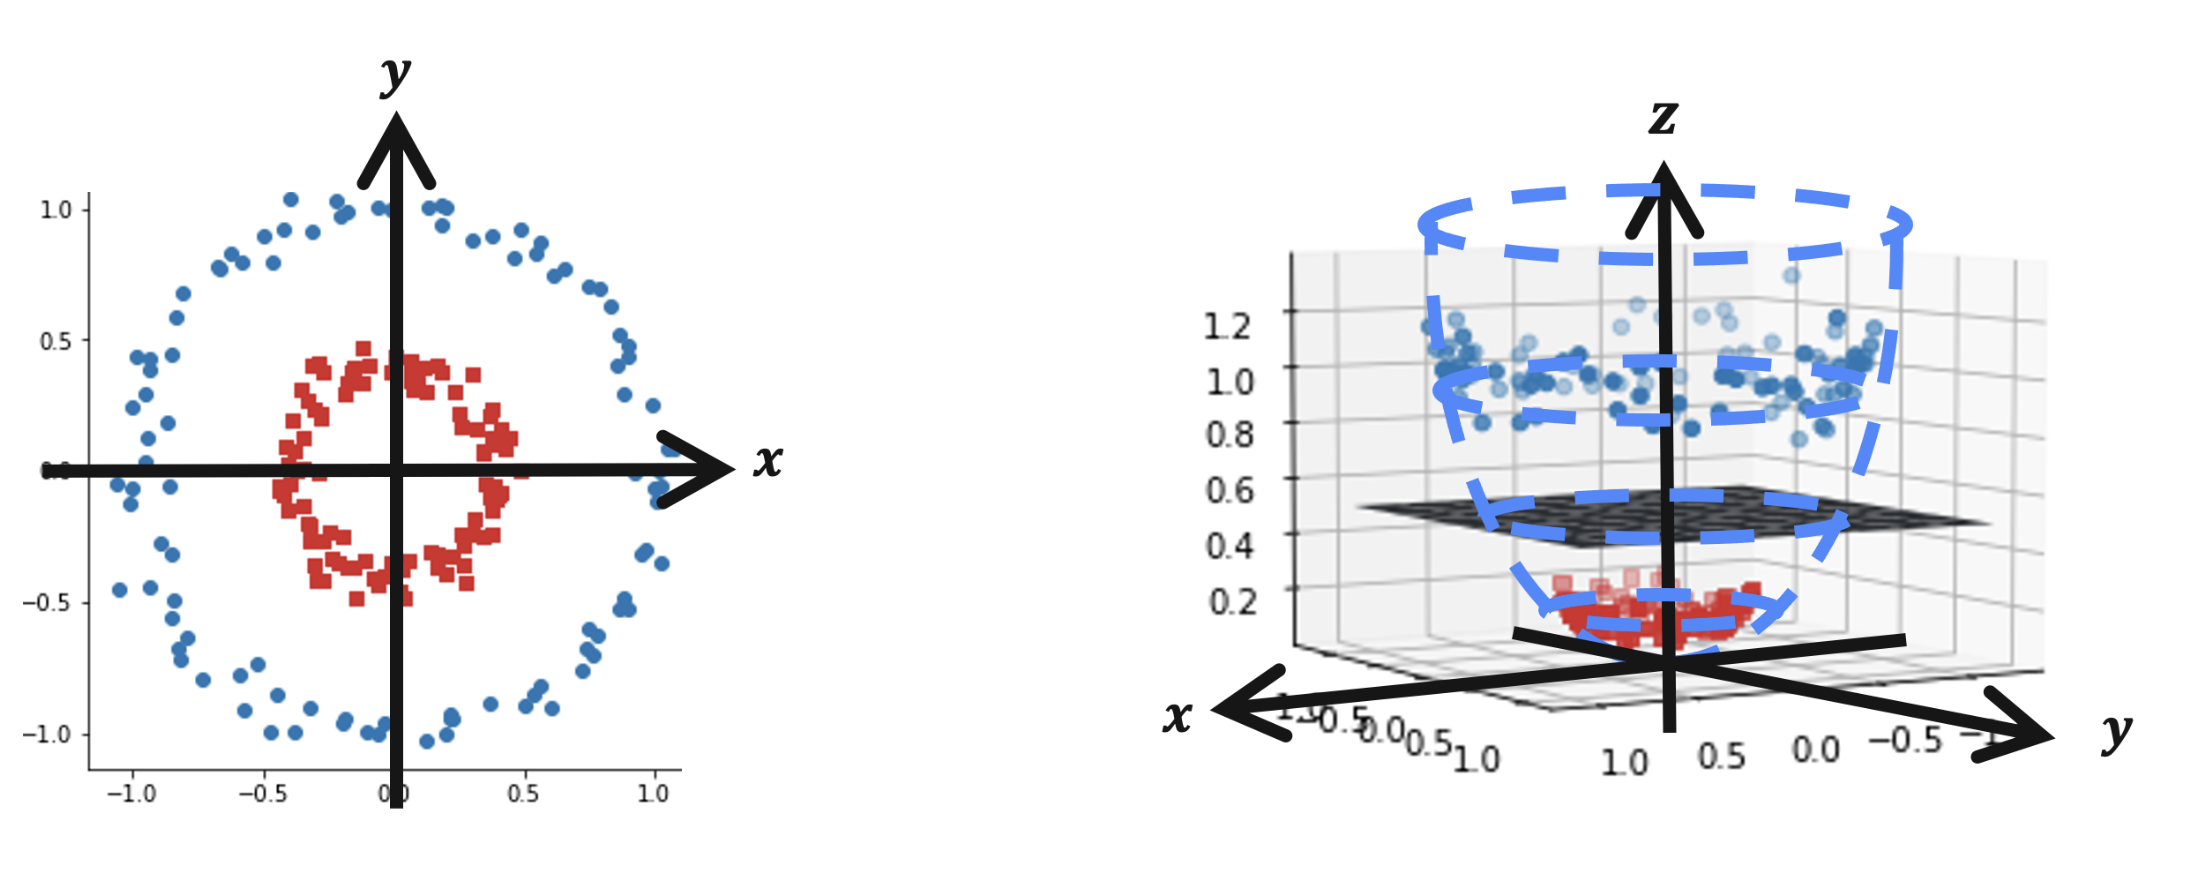

右上の図に示されているように、3次元では$z=0.5$の超平面で分離可能であることがわかります。

量子機械学習では、量子特徴量マップはユニタリー変換$\vec{U_\phi}(\vec{x})$を用いて$\vec{x} \rightarrow | \phi(\vec{x})\rangle$に変換します。このユニタリー変換は一般的にはパラメーター付きの量子回路です。量子機械学習におけるパラメーター付き量子回路は、データの符号化や量子モデルとして使われる傾向があります。そのパラメーターは、データと最適化プロセスによって決定されます。この変換により、ヒルベルト空間内の状態の重要な部分集合を生成することができ、機械学習モデルとして利用することができます。詳しい解説は、Qiskitテキストブックの **[パラメーター化された量子回路](https://ja.learn.qiskit.org/course/machine-learning/parameterized-quantum-circuits)** の章をご覧ください。

古典的な機械学習に対する優位性を得るためには、古典でのシミュレーションは難しいが、ノイズのある量子デバイスで実装可能な量子特徴量マップを構築することが重要です。深さ$d$の量子特徴量マップは、以下のように実装することができます。

$$ \mathcal{U}_{\Phi(\vec{x})} = \prod_d U_{\Phi(\vec{x})}H^{\otimes n} $$

$$ U_{\Phi(\vec{x})}=\exp\left(i\sum_{S\subseteq[n]}\phi_S(\vec{x})\prod_{k\in S} P_i\right) $$

これは、アダマールゲートとエンタングリング・ブロック$U_{\Phi(\vec{x})}$（エンタングルゲート（CNOTなど）を含む回路部分）をインターリーブした層を含み、$d=2$の場合、以下の回路図に示すように古典データを符号化します。

<center><img src="https://learn.qiskit.org/content/quantum-machine-learning/images/kernel/featuremap.svg"/></center>

エンタングリング・ブロックの中の $U_{\Phi(\vec{x})}$: $P_i \in \{ I, X, Y, Z \}$ はパウリ行列を表し、インデックス$S$は異なる量子ビットまたはデータポイント間の接続性を表します。パウリ行列は以下のように表されます。

$$ I = \sigma_0 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$


$$ X = \sigma_1 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$

$$ Y = \sigma_2 = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$

$$ Z = \sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$


このLabでは、 **[RealAmplitude](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)** を使ってパラメーター付きの量子回路を構築します。

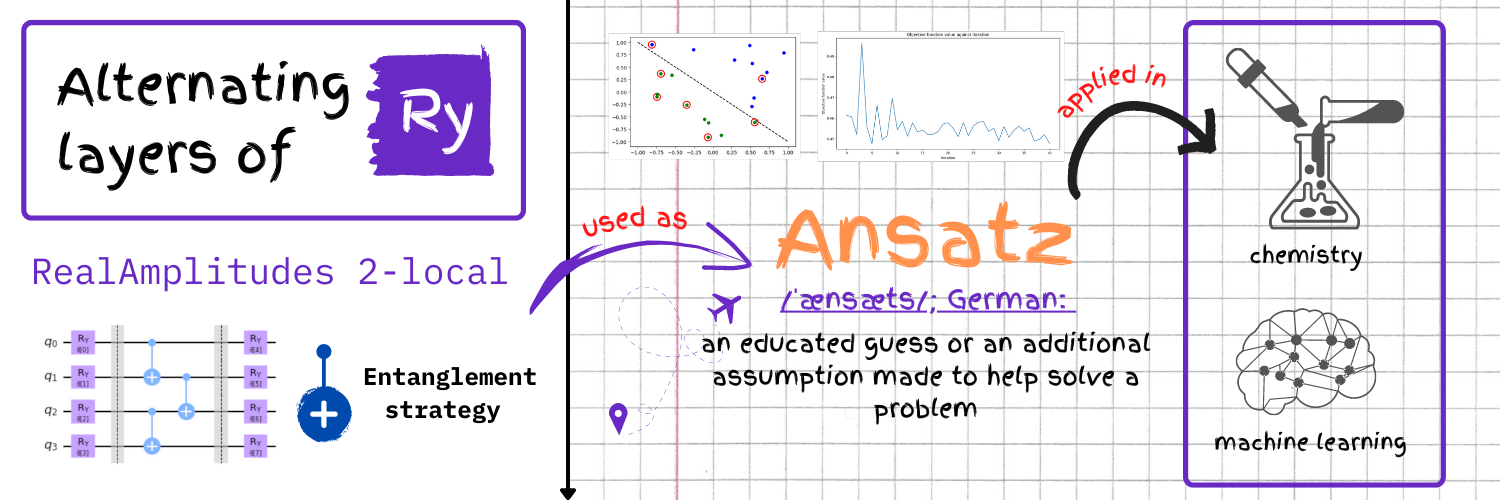

#### Exercise 1

````{admonition} パラメータ付き量子回路の構築
下図に示された **パラメーター付きの量子回路** を`RealAmplitude`を使って組んでください。

```python
from qiskit.circuit.library import RealAmplitudes

def lab2_ex1():
    #
    #
    # build your code here
    #
    #
    
    return qc

qc = lab2_ex1()
qc.decompose().draw('mpl')
```

![](./resources/2022-aut-lab2-ex1.png)

````

#### Exercise 1解答例

In [2]:
from qiskit.circuit.library import RealAmplitudes

def lab2_ex1():
    qc = RealAmplitudes(4, entanglement='pairwise', reps=1, insert_barriers=True)
    return qc

qc = lab2_ex1()
qc.decompose().draw('mpl')

NameError: name 'qc' is not defined

  ```{admonition} 解説
  :class: tip
  RealAmplitudesを使用するとAnsatzとして使用されるパラメータ化された回路を作成できます。
  entanglementパラメータにてentanglementの構成を指定できます。
  また、repsパラメータにてどの程度entanglementの後に回転ゲートを構成するかを指定することで回路の表現力を指定できます。
  ```

### 実機を模した量子コンピューターによる分布の誤差

sample_train[0]データをパラメーターに入力し、この回路の出力する確率分布を調べてみましょう。量子シミュレーター(qasm_simulator)と実機を模したノイズ付きシミュレーター(FakeManilaV2)で実行し、私たちはどれくらい精度を向上させなければいけないか確認します。

In [1]:
encode = qc.bind_parameters(sample_train[0])
encode.measure_all()
encode.decompose().draw("mpl")

In [10]:
# Use Aer's qasm_simulator
from qiskit import Aer
backend_sim = Aer.get_backend('qasm_simulator')

from qiskit import transpile
job_sim = backend_sim.run(transpile(encode, backend_sim), shots=1024)
result_sim = job_sim.result()
counts_ideal = result_sim.get_counts(encode)

In [11]:
from qiskit.providers.fake_provider import FakeManilaV2
# Get a fake backend from the fake provider
noisy_backend = FakeManilaV2()

# Run the transpiled circuit using the simulated fake backend
job_noisy = noisy_backend.run(transpile(encode, noisy_backend), shots=1024)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts(encode)

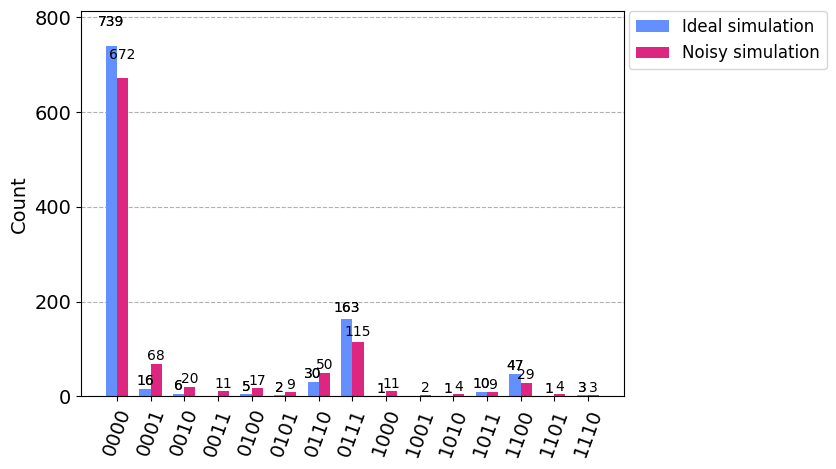

In [12]:
from qiskit.visualization import plot_histogram
legend = ['Ideal simulation', 'Noisy simulation']
plot_histogram([counts_ideal, counts_noisy], legend=legend)

## Part II: Samplerでのエラー緩和の実装

フォールト・トレラントな量子コンピューターはまだしばらく先の話であり、近い将来の量子コンピューティング時代には、ノイズに対処する方法を考案する必要があります。

実機の量子コンピューターを利用する場合、ノイズをいかに低減するかを考える必要があります。Qiskit Runtime Primitivesは、エラー緩和を適用することができます。ここでは、Matrix-free measurement mitigation (M3)の使用を検討してみます。M3について、Lab1の4.1章を参照して思いだし、以下のexerciseに解答してください。

#### Exercise 2

````{admonition} Quiz
**Matrix-free Measurement Mitigation (M3)** に関する以下の記述について、正しいか否かを答えてください。

- Q1：M3は量子ゲートエラー緩和技術であり、フォールト・トレラントな量子コンピューターに使用される。

- Q2：M3は、指数関数的なオーバーヘッドをランダムビット列の数によるスケーリングに落とし込んで作られる部分空間において動作する。

- Q3: M3は、ノイズのスケールファクターを増幅し、ノイズがない場合の測定値を推定する。

- Q4: M3の技術は、直接的な解決方法と比較して、緩和のためのメモリー使用量を削減することができる。

```python
# please answer 'yes' or 'no'
# Q1
answer_lab2_ex2_1 = ''
# Q2
answer_lab2_ex2_2 = ''
# Q3
answer_lab2_ex2_3 = ''
# Q4
answer_lab2_ex2_4 = ''
```

````

#### Exercise 2解答例

In [ ]:
# please answer 'yes' or 'no'
# Q1
answer_lab2_ex2_1 = 'no'
# Q2
answer_lab2_ex2_2 = 'no'
# Q3
answer_lab2_ex2_3 = 'no'
# Q4
answer_lab2_ex2_4 = 'yes'

  ```{admonition} 解説
  :class: tip
  qiskitに実装されているエラー緩和技術には以下のようなものがあり、Qiskit Runtime Primitiveで利用することができます。
  
  - Matrix-free Measurement Mitigation（M3）：
      - ノイズありの入力ビットの読み出し誤差を緩和し、緩和された準確率分布を生成できます。M3はNISQに対する誤り抑制を行うものでフォールトトレラントな量子誤り訂正が可能な量子コンピュータに対して使用するものではありません。M3はmatrix-freeな手法で解を求めるため、誤り抑制のためのメモリー使用量と計算時間を削減することができます。
  - トワイル読み出しエラー消去法（TREX）：
      - 測定直前にXゲートを介してランダムに量子ビットを反転させ、Xゲートが適用された場合には対応する測定ビットを反転させることで測定に関するノイズを対角化し、測定誤差を低減します。
  
  - ゼロノイズ外挿（ZNE）：
      - 回路内のノイズを増幅し、いくつかの異なるレベルのノイズの観測値の期待値を計算し、測定した期待値を用いてゼロノイズ限界における理想的な期待値を推測します。
  
  - 確率論的エラーキャンセル（PEC）
      - 相関のあるノイズを捉えることができる疎なノイズモデルを学習して、反転させることでエラーを軽減します。PECではノイズ・モデルの学習や回路サンプリングに関して指数関数的なオーバーヘッドが発生します。  
  ```

まずはじめに、Samplerを使って、先程のパラメーター化量子回路を実行および測定することにより、(準)確率分布を生成する方法を紹介します。誤差緩和を行わない場合、`Sampler`は測定したサンプルに対応する確率分布を返します。

In [13]:
# Runtime sampler using Sessions
from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session, Sampler

In [14]:
# Save the Runtime account credenials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`

# my_tokenに自身のアカウントのtokenを入力してください。
QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True)

In [15]:
# authenticate at Qiskit runtime service
service = QiskitRuntimeService()
# choose a cloud simulator
backend = service.backends(simulator=True)[0]

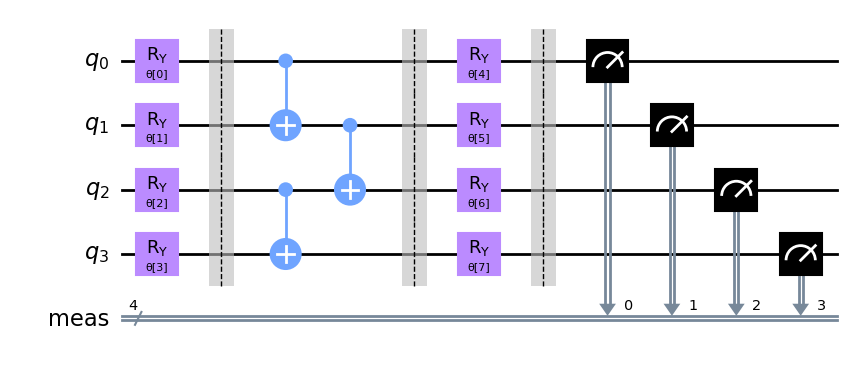

In [16]:
qc.measure_all()
qc.decompose().draw('mpl')

In [17]:
# Do not change the seed of simulatior in Options
options = Options(simulator={"seed_simulator": 1234},resilience_level=0)

In [18]:
shots = 10000
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc], parameter_values=[sample_train[0]], shots=shots)
    samples_sim = job.result()

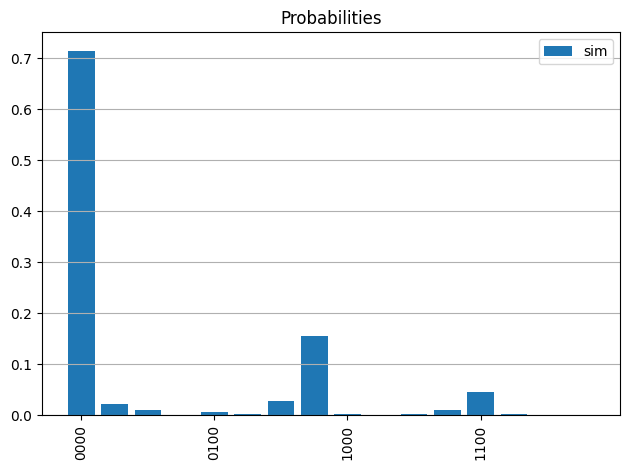

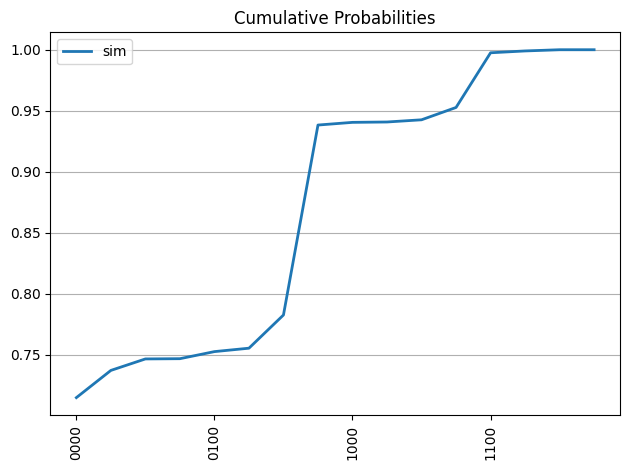

In [19]:
# illustrate resulting (cumulative) probabilities
probs_sim = process_samples(qc, samples_sim)
plot_probabilities(qc, probs_sim, 'sim')
plot_cumulative_probabilities(qc, [probs_sim], ['sim'])

次に、本物のバックエンドの代わりにノイズありシミュレーターを使用しても確率分布を求めます。noisy simulatorを使うには、fake providerからfake backend を使ったnoise modelを作成する必要があります。

fake providerモジュールには、fake provider とfake backendのクラスが含まれています。fake backendは、システムスナップショットを使用して IBM Quantum systemの動作を模倣するように構築されています。システムスナップショットには、coupling map、基底ゲート、量子ビットの特性（T1、T2、エラー率など）など、量子システムのノイズありシミュレーションを行うために必要な情報が含まれています。

今回は、`FakeManila`をインポートし、noise modelを作成します。このモデルで、`Options`の中に、`simulator`のオプションで、"noise_model"、"basis_gates"、"coupling_map"、"seed_simulator"などのデータを設定できます。

In [20]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel

fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

options_noise = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 1234
    },
    resilience_level=0
)

In [21]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options_noise)
    job = sampler.run(circuits=[qc], parameter_values=[sample_train[0]], shots=shots)
    samples_noise = job.result()

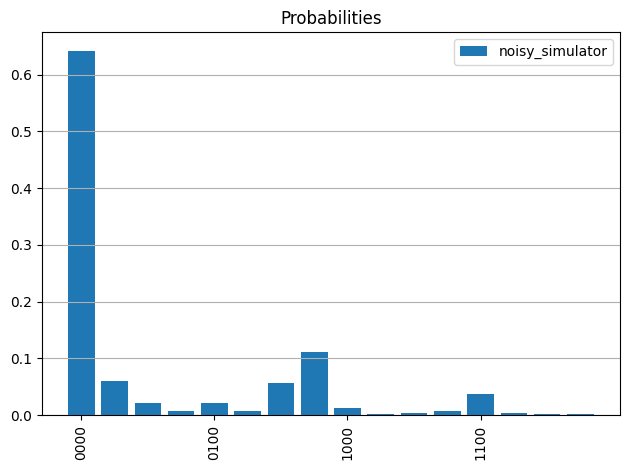

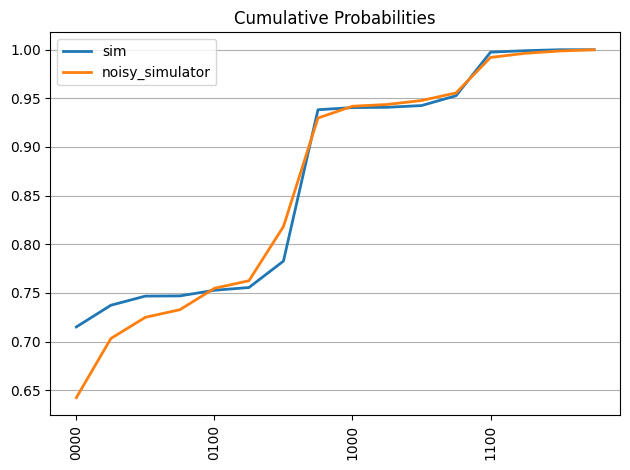

In [22]:
# illustrate resulting (cumulative) probabilities
probs_noise = process_samples(qc, samples_noise)
plot_probabilities(qc,probs_noise, 'noisy_simulator')
plot_cumulative_probabilities(qc,[probs_sim, probs_noise], ['sim', 'noisy_simulator'])

Qiskit RuntimeでM3緩和機能を使うには、`resilience_level=1`を`options`の引数に追加します。

In [23]:
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 1234
    },
    resilience_level=1,
)

In [24]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[qc], parameter_values=[sample_train[0]], shots=shots)
    samples_with_em = job.result()

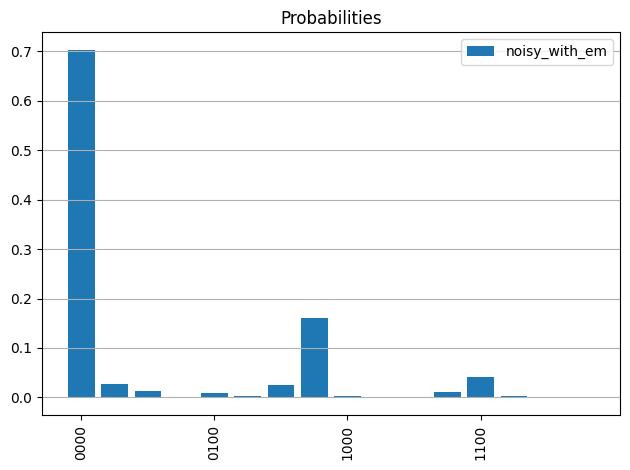

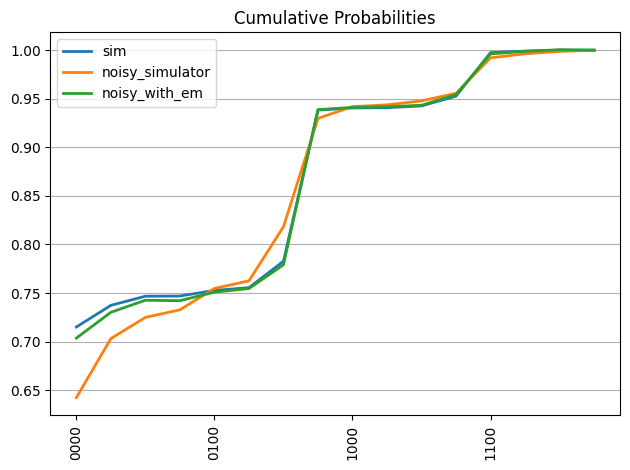

In [25]:
# illustrate resulting (cumulative) probabilities
probs_with_em = process_samples(qc, samples_with_em)
plot_probabilities(qc, probs_with_em, 'noisy_with_em')
plot_cumulative_probabilities(qc, [probs_sim, probs_noise, probs_with_em], ['sim', 'noisy_simulator', 'noisy_with_em'])

この最後のプロットは、誤差を緩和することで、理想的なシミュレーションにかなり近い確率分布になることを示しています。

## Part III: Samplerを用いた量子状態の忠実度の推定

このSamplerの応用として、2つの量子状態の忠実度を推定することがよく行われています。

忠実度とは、2つの量子状態がどの程度近いかを示す指標です。例えば、2つの量子状態$\rho$と$\sigma$の2つの量子状態があるとし、それらをどのように区別するかを考えます。その忠実度を見れば、どの程度似ているか、言い換えれば、どの程度近いかが簡単に分かります。忠実度の値は$0$〜$1$であり、忠実度が$1$であれば、2つの状態が全く同じであることを意味します。また、$0$であれば、全く異なる状態であることが分かります。忠実度は密度行列の空間上のメトリックではありませんが、この空間上のBuresメトリックを定義するのに使うことができます。

状態$|\psi\rangle = U|0\rangle$と$|\varphi\rangle = V|0\rangle$が与えられたとします。$U$ と $V$はユニタリーです。その忠実度は次のように定義されます。

$$\left|\langle \psi \mid \varphi \rangle\right|^2 = \left|\langle 0 \mid U^{\dagger} V \mid 0\rangle \right|^2.$$

これは、まず$V$を適用し、次に$U$の逆行列を適用し、そして$|0\rangle$の確率を測定することで推定することができます。

説明のために、$U = V$ のパラメーター化回路とし、パラメーターを変化させて様々な状態を実現します。

Exercise 1 の回路の忠実度の回路を作成してみましょう。

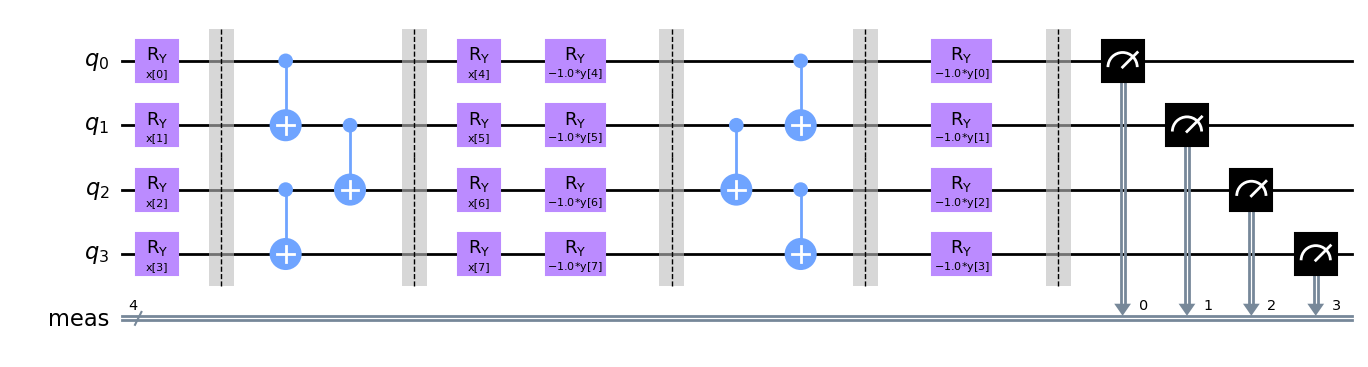

In [26]:
# parametrized circuit defining U first state
circuit_1 = RealAmplitudes(4, reps=1, entanglement='pairwise', 
                           insert_barriers=True, parameter_prefix='x')
    
# parametrized circuit V defining second state
circuit_2 = RealAmplitudes(4, reps=1, entanglement='pairwise', 
                           insert_barriers=True, parameter_prefix='y')

# combining circuits to evaluate U^dagger V
fidelity_circuit = circuit_1.copy()
fidelity_circuit.append(circuit_2.inverse().decompose(), range(fidelity_circuit.num_qubits))
fidelity_circuit.measure_all()

# drawing resulting circuit to estimate fidelity
fidelity_circuit.decompose().draw('mpl')

2つの状態に対して、パラメーター$\theta_1, \theta_2$を使って、忠実度を推定します。$c \in [0, 1]$に対して、$\theta_1$ に対応する状態と$\theta_1 + c * (\theta_2 - \theta_1)$に対応する状態との間の忠実度を計算します。

両状態で同じパラメーター化回路を使うので、$c=0$は両状態が$\theta_1$に対応することを意味し、忠実度は$1$に等しいと考えられます。$c$が増加すると、忠実度は減少します。($\theta_2$に依存して、ある点まで)。

ここでは、$\theta_1, \theta_2$に、`sample_train[0]`、`sample_train[2]`を用います。

In [27]:
# draw parameters for states 1 & 2
theta_1 = sample_train[0] # label"0"
theta_2 = sample_train[2] # label"1"

# linear combinations of theta_1 and theta_2
thetas = [theta_1 + c * (theta_2 - theta_1) for c in np.linspace(0, 1, 10)]

# list the parameters
theta_list = []
for theta_ in thetas:
    theta_list.append(list(theta_1) + list(theta_))

#### Exercise 3

````{admonition} フィデリティを求める
以下の条件で **量子状態忠実度** を求めるための **sampler** コードを作ってください
実機の量子コンピューターを使う際には、ノイズに対処する方法を考える必要があります。
ショット数は`shots = 10000`に固定してください。

- 理想的なシミュレーター
- 誤差を緩和しない`FakeManila`シミュレーター
- 誤差を緩和した`FakeManila`シミュレーター

誤差緩和には、先程と同じように、`resilience_level=1`を使用して、M3緩和を使います。

```python
# create sampler using simulator and sample fidelities
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job =  # build your code here
    fidelity_samples_sim = job.result()

    sampler = Sampler(options=options_noise)
    job =  # build your code here
    fidelity_samples_noise = job.result()
    
    sampler = Sampler(options=options_with_em)
    job =  # build your code here
    fidelity_samples_with_em = job.result()
    
fidelities_sim = []
fidelities_noise = []
fidelities_with_em = []

for i in range(10):
    fidelities_sim += [fidelity_samples_sim.quasi_dists[i][0]]
    fidelities_noise += [fidelity_samples_noise.quasi_dists[i][0]]
    fidelities_with_em += [fidelity_samples_with_em.quasi_dists[i][0]]
```

````

#### Exercise 3解答例

In [1]:
# create sampler using simulator and sample fidelities
with Session(service=service, backend=backend):
  sampler = Sampler(options=options)
  job = sampler.run(circuits=[fidelity_circuit]*len(theta_list), parameter_values=theta_list, shots=10000)
  fidelity_samples_sim = job.result()

  sampler = Sampler(options=options_noise)
  job = sampler.run(circuits=[fidelity_circuit]*len(theta_list), parameter_values=theta_list, shots=10000)
  fidelity_samples_noise = job.result()
  
  sampler = Sampler(options=options_with_em)
  job = sampler.run(circuits=[fidelity_circuit]*len(theta_list), parameter_values=theta_list, shots=10000)
  fidelity_samples_with_em = job.result()
    
fidelities_sim = []
fidelities_noise = []
fidelities_with_em = []

for i in range(10):
    fidelities_sim += [fidelity_samples_sim.quasi_dists[i][0]]
    fidelities_noise += [fidelity_samples_noise.quasi_dists[i][0]]
    fidelities_with_em += [fidelity_samples_with_em.quasi_dists[i][0]]

NameError: name 'Session' is not defined

  ```{admonition} 解説
  :class: tip
  sampler.run()メソッドを実行することでsamplerを実行することができます。

  シミュレーターはSamplerの初期化の際にoptionsで以下の通りに指定できます。
  - 理想的なシミュレーター（optionns=options）
  - 誤差を緩和しないFakeManilaシミュレーター（options=options_noise）
  - 誤差を緩和したFakeManilaシミュレーター（options=options_with_em）
  
  sampler実行の際にはcircuits=[fidelity_circuit]*len(theta_list), parameter_values=theta_list, shots=10000を指定して実行します。
  ここでparameter_valuesにはtheta_listの10個の値が渡され、circuitsには忠実度を推定するfidelity_circuitをtheta_listの長さの10個分の回路を渡しています。
  これにより、fidelity_circuitをtheta_listの10個の値で評価した結果が得られます。
  ```

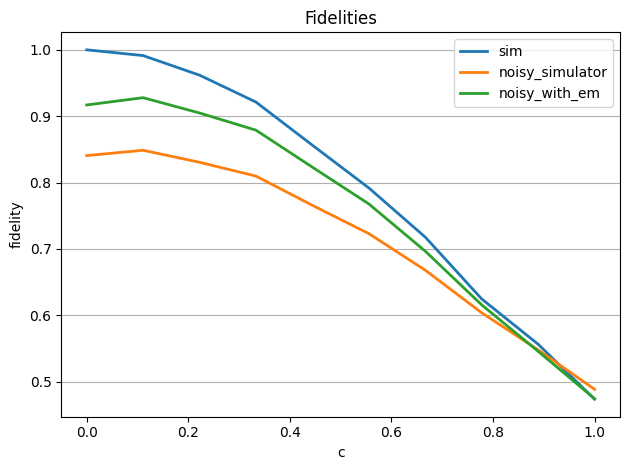

In [30]:
# plot resulting fidelities for different linear combinations of theta_1 and theta_2
plot_fidelities([fidelities_sim, fidelities_noise, fidelities_with_em], ['sim', 'noisy_simulator', 'noisy_with_em'])

再び、この最後のプロットから、誤差を軽減することで、シミュレーションにかなり近い忠実度になることが分かります。

## Part IV: 量子カーネルと量子サポートベクターマシン

忠実度回路を元にして、量子カーネルを評価する関数を構築することができます。

量子サポートベクターマシン(Quantum Support Vector Machine, QSVM)は，古典的なサポートベクターマシンに量子カーネルを搭載したものです。量子カーネルを定義する一般的なアプローチは、特徴量空間におけるHilbert-Schmidt内積に相当する2つの異なる入力の特徴量マップの忠実度を作ることです。

### 量子カーネル機械学習

機械学習アルゴリズムでは，カーネル関数$k(\vec{x}_i, \vec{x}_j) = \langle f(\vec{x}_i), f(\vec{x}_j) \rangle$を用いて、入力データを高次元特徴量にマッピングすることができます。ここで、$k$はカーネル関数、$\vec{x}_i,\vec{x}_j$ は$n$次元の入力，$f$ は$n$次元から$m$次元の空間への写像です。データが有限であることを考慮すると、量子カーネルは行列として表現できます。

$$K_{ij}=|\langle\phi^{\dagger}(\vec{x}_j)|\phi(\vec{x}_i)\rangle|^2$$ 

特徴量マップがパラメーター化された量子回路であると考えると、$n$量子ビットのカーネル行列は次のように計算できます。

$$|\langle\phi^{\dagger}(\vec{x}_j)|\phi(\vec{x}_i)\rangle|^2 = |\langle 0^{\otimes n}|U^{\dagger}_{\phi(\vec{x}_j)} U_{\phi(\vec{x}_i)}|0^{\otimes n} \rangle |^2$$ 


量子カーネルサポートベクトル分類アルゴリズムは、分類と回帰のために特徴量空間に超平面を構築するために、以下のステップで行います **[[5]](https://www.nature.com/articles/s41586-019-0980-2) [[6]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.040504)** 。

1. 学習用の量子カーネル行列を構築します。特徴量マップを適用し、遷移確率$K_{ij}=|\langle 0|U^{\dagger}_{\phi(\vec{x}_j)} U_{\phi(\vec{x}_i)}|0 \rangle |^2$ をデータポイントの各ペアに対して測定します。
2. テスト用の量子カーネル行列を構築します。特徴量マップを適用し、遷移確率$K_{ij}=|\langle 0|U^{\dagger}_{\phi(\vec{y}_i)} U_{\phi(\vec{x}_i)}|0 \rangle |^2$ を各学習用データポイント $\vec{x}_i$とテスト用データポイント$\vec{y}_i$に対して測定します。
3. 古典のサポートベクターマシン分類アルゴリズムを使って、量子カーネル行列の学習とテストを行います。


超平面は、どのクラスについても、最も近い学習データ点との距離が最大になるのが理想的です。

<center><img src="https://learn.qiskit.org/content/quantum-machine-learning/images/kernel/qsvc.svg"/></center>


忠実度回路を用いて量子カーネル回路を構築してみましょう。データセットによっては、QSVMはノイズに強いのですが、ここではエラー緩和を施して、確実な計算を行うことにします。

カーネル行列について、いくつか注意すべき点があります：

- 各行/列は、データセット内の他のすべてのデータポイントとともに、単一のデータポイントの遷移振幅を表します。
- 自分自身へのデータポイントの遷移振幅は$1$であるため、行列は対角要素が$1$です。
- 行列は対称であり、$x \rightarrow y$の遷移振幅は$y \rightarrow x$と同じです。

### 計算すべきカーネル行列の要素数

データ数が$n$のとき、カーネル行列は、$n \times n$であり、要素数は、$n^2$個です。しかし、カーネル行列は対称行列であるため、計算する要素数を少なくすることができます。データ数が$n$のとき、計算しなければならないカーネル行列の要素数は、
$$ (n-1) + (n-2) + ... + 2 + 1 $$
個です。
この数の分だけ、量子カーネルのパラメーター化回路を作成し、計算する必要があります。

例えば、データ数が$n=25$の時、カーネル行列には$25\times25=625$個の要素がありますが、計算に必要な要素数は、$300$個です。

In [31]:
n = 25   
circuit_num = np.arange(0,n).sum()
print(circuit_num)

300


#### 量子カーネル回路にデータをエンコードする関数
次に、量子カーネル回路にデータをエンコードする関数 `data_append` を作成します。ここで、`n`はデータ数、`x1`、`x2`は入力するデータのリストです。

In [32]:
def data_append(n, x1, x2):
    para_data = []
    #
    for i in range(n):
        for j in range(n):
            if i<j:
                para_data.append(list(x1[i])+list(x2[j]))
    #   
    return para_data

#### Exercise 4

````{admonition} 量子カーネルの計算
`circuit_num`と`data_append`を使用して **Sampler** を使って、**量子カーネル** を計算してください。学習データとして、前の章「手書きのビット文字列」で作成した `sample_train` を使用してください。また、エラー緩和 `resilience_level=1`を使ってノイズありシミュレーター`FakeManila`で実行してください。

```python
with Session(service=service, backend=backend):
    #
    sampler = # build your code here
    job =  # build your code here
    quantum_kernel_em = job.result()
    #
```
````

#### Exercise 4解答例

In [ ]:
with Session(service=service, backend=backend):
    #
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[fidelity_circuit]*circuit_num, parameter_values=data_append(n,sample_train,sample_train), shots=10000)
    quantum_kernel_em = job.result()
    #

  ```{admonition} 解説
  :class: tip
  ここでSamplerには誤差を緩和したFakeManilaシミュレーター（options=options_with_em）を指定します。
  量子カーネルの計算のためには対称行列であることによる計算の省略を除いて、sample_trainのすべての組み合わせに対して計算を実行する必要があります。
  
  上記の組み合わせはdata_append関数に$n=25$, sample_trainを与えることでデータを得ることができます。
  circuitにはparameter_valuesで渡したデータ数と同じ数（circuit_num）の回路を渡す必要があるので注意が必要です。
  ```

In [35]:
kernel_em = []
for i in range(circuit_num):
    kernel_em += [quantum_kernel_em.quasi_dists[i][0]]

以下のコードでカーネル行列$K_{ij}$を表示することができます。

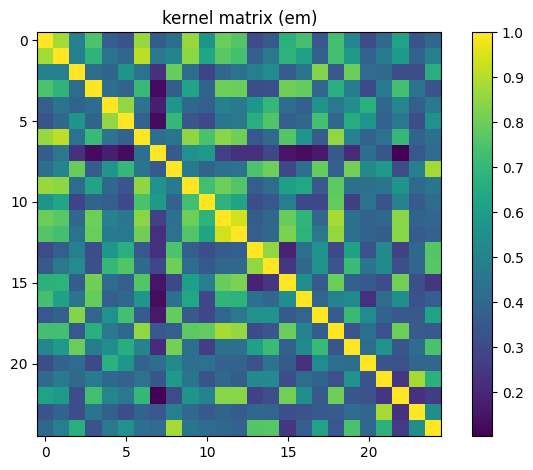

In [36]:
K = np.zeros((n, n))
count = 0
for i in range(n):
    for j in range(n):
        if j<i:
            K[i,j] = K[j,i]
        else:
            if j==i:
                K[i,j] = 1
            else:
                K[i,j] = kernel_em[count]
                count+=1
plot_matrix(K, 'kernel matrix (em)')

上のプロットでは、先ほど説明したカーネル行列$K_{ij}=|\langle\phi^{\dagger}(\vec{x}_j)|\phi(\vec{x}_i)\rangle|^2$の特徴を確認することができます:

- 各行/列は、データセット内の他のすべてのデータポイントとともに、単一のデータポイントの遷移振幅を表します。
- 自分自身へのデータポイントの遷移振幅は$1$であるため、行列は対角要素が$1$です。
- 行列は対称であり、$x \rightarrow y$の遷移振幅は$y \rightarrow x$と同じです。

学習用のラベルを確認して、正答率を確認してみましょう。

In [37]:
svc = SVC(kernel='precomputed')
# train SVM
svc.fit(K, labels_train)

# score SVM on training data
y_predict = svc.predict(K)
print('accuracy (sim):', sum(y_predict == labels_train)/len(labels_train))

accuracy (sim): 1.0


In [38]:
print(labels_train, y_predict)

[0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1] [0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1]


おめでとうございます。あなたは正確な量子分類器を作成することに成功しました。

#### Exercise 5

````{admonition} 未知のビット列の解読
あなたの量子分類器で **未知のビット列`unknown_data`を解読** してください。<br>
正方行列ではないカーネルに対応するために、データを量子カーネル回路にエンコードする`circuit_num`と関数 `data_append`を変更する必要があります。エラー緩和 `resilience_level=1`を使ってノイズありシミュレーター`FakeManila` で実行してください。以下の二つの結果を提出します。
- 未知のビット列の解読結果：`ex5_predict`
- `unknown_data`と`sample_train`で計算されたカーネル行列：`kernel_ex5`

未知のビット列を解読するために計算が必要なカーネル行列の要素数`circuit_num_ex5`を取得します。以下のコードを作成してください。

```python
n1 = len(unknown_data) # the number of unknown bit-string
n2 = 25 # the number of trained data
circuit_num_ex5 = # build your code here
print(circuit_num_ex5)
```

次に、未知のビット列を解読するために、量子カーネル回路にデータをエンコードする関数`data_append_ex5`を作成します。引数は以下の通りです：

- n1: int, 未知ビット列の数
- n2: int, 学習済みデータの個数
- x1: list, 未知データ
- x2: list, 学習済みサンプルデータ

```python
def data_append_ex5(n1, n2, x1, x2):
    para_data_ex5 = []
    #
    #
    # build your code here
    #
    #
    return para_data_ex5
```

また、未知のビット列に対する量子カーネル要素を計算するためのSamplerのコードを構築します。

```python
with Session(service=service, backend=backend):   
    sampler = # build your code here
    job =  # build your code here
    quantum_kernel_ex5 = job.result()  
```
````

#### Exercise 5解答例

In [ ]:
unknown_data = ([[ 0.88925334, -0.45107705, -0.17165649,  0.21764645,  0.06976178,
        -0.56642651, -0.2177827 ,  0.0399222 ],
       [-0.58864187, -0.21179537, -0.52811919, -0.5568292 , -0.09719389,
        -0.87511725, -0.29104206, -0.3959822 ],
       [-0.4408889 , -0.113614  , -0.55612463, -0.3135209 , -0.37814493,
        -0.54298913, -0.43088957, -0.30052965],
       [ 0.73914419, -0.67147632, -0.43496568,  0.15402565, -0.2403563 ,
        -0.22006604, -0.07169684, -0.06741802],
       [-0.57393773, -0.27554408, -0.19539549,  0.38801239,  0.74179855,
         0.45881712, -0.08612418, -0.12852764],
       [ 0.84167362, -0.62435747, -0.10059876,  0.5794717 , -0.21003759,
        -0.34971761, -0.10780177, -0.47967332],
       [-0.68499849, -0.20315101, -0.3042834 ,  0.15454653,  0.16849424,
         0.43281474, -0.25603947, -0.38992326],
       [ 0.05483369,  0.94238598, -0.07558843, -0.07849555,  0.14751995,
        -0.48487454,  0.10211269, -0.17232739],
       [ 0.47194409, -0.52603499,  0.76659229, -0.90257671,  0.18145297,
         0.14082232, -0.27658999, -0.0995099 ],
       [ 0.89040898, -0.573903  , -0.11297795,  0.67050626,  0.00995783,
        -0.5648723 , -0.23517219,  0.07979215]])

n1 = len(unknown_data) # the number of unknown bit-string
n2 = 25 # the number of trained data
circuit_num_ex5 = circuit_num_ex5 = n1 * n2 
print(circuit_num_ex5)

  ```{admonition} 解説
  :class: tip
  ここでsamplerでは未知のビット列と学習データ（sample_train）間の遷移確率を計算するため、指定するデータ数は未知のビット列の数$n1$ x 学習データのデータ数$n2$となります。
  ```

In [ ]:
  def data_append_ex5(n1, n2, x1, x2):
      para_data_ex5 = []
      for i in range(n1):
          for j in range(n2):
              para_data_ex5.append(list(x1[i]) + list(x2[j]))
      return para_data_ex5

  ```{admonition} 解説
  :class: tip
  data_append_ex5はdata_append関数を拡張した形で未知のビット列と学習データ（sample_train）を指定した場合のデータを返せるように作成します。
  ```

In [ ]:
with Session(service=service, backend=backend):   
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[fidelity_circuit]*circuit_num_ex5, parameter_values=data_append_ex5(n1,n2,unknown_data,sample_train), shots=10000)
    quantum_kernel_ex5 = job.result()  

  ```{admonition} 解説
  :class: tip
  ここでSamplerには誤差を緩和したFakeManilaシミュレーター（options=options_with_em）を指定します。
  samplerの実行ではparameter_valuesとして未知のビット列に対する量子カーネル要素を指定することで、未知のビット列の遷移確率を計算します。
  ```

以下のコードでカーネル行列を表示することができます。

In [44]:
kernel_ex5 = []
for i in range(circuit_num_ex5):
    kernel_ex5 += [quantum_kernel_ex5.quasi_dists[i][0]]

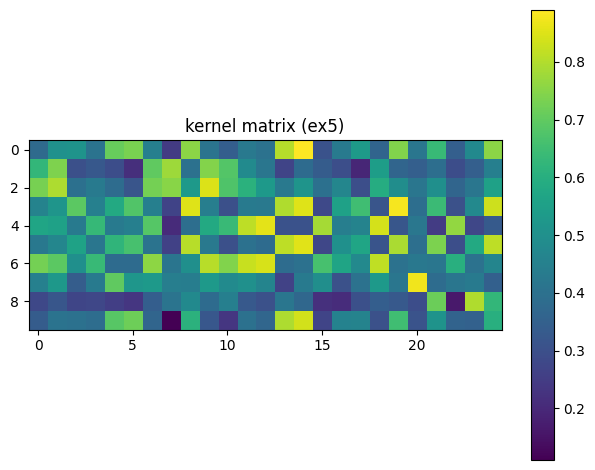

In [45]:
K_ex5 = np.zeros((n1, n2))
count = 0
for i in range(n1):
    for j in range(n2):
        K_ex5[i,j] = kernel_ex5[count]
        count+=1
plot_matrix(K_ex5, 'kernel matrix (ex5)')

未知のビット列を以下のコードで予測します。

In [46]:
ex5_predict = svc.predict(K_ex5)
print(ex5_predict)

[1 0 0 1 0 1 0 1 1 1]


## 参考文献
- [1] **[Introduction to Quantum Machine Learning - Qiskit Learn](https://learn.qiskit.org/course/machine-learning/introduction)**
- [2] **[Key questions for the quantum machine learners to ask themselves - Nathan Wiebe](https://iopscience.iop.org/article/10.1088/1367-2630/abac39/meta)**
- [3] **[Quantum machine learning - Jacob Biamonte, Peter Wittek, Nicola Pancotti, Patrick Rebentrost, Nathan Wiebe & Seth Lloyd](https://www.nature.com/articles/nature23474)**
- [4] **[Quantum feature maps and kernels - Qiskit Learn](https://learn.qiskit.org/course/machine-learning/quantum-feature-maps-kernels)**
- [5] **[Supervised learning with quantum-enhanced feature spaces - Vojtěch Havlíček, Antonio D. Córcoles, Kristan Temme, Aram W. Harrow, Abhinav Kandala, Jerry M. Chow & Jay M. Gambetta ](https://www.nature.com/articles/s41586-019-0980-2)**
- [6] **[Quantum Machine Learning in Feature Hilbert Spaces - Maria Schuld and Nathan Killoran](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.040504)**

## 補足情報

<b>Created by:</b> Kifumi Numata, Inho Choi, Dayeong Kang

<b>Advisor:</b> Anna Phan

<b>Creative assets by:</b> Radha Pyari Sandhir

<b>Translated and adapted by:</b> Kifumi Numata, Yuri Kobayashi

Version: 1.0

In [47]:
from qiskit.tools.jupyter import *
%qiskit_version_table